Human Resource Analytics  helps us in  interprating organizational data. It finds the people-related trends in the data and allows HR department to take appropriate steps to keep the organization running smoothly.Attrition in a corporate setup is one of the complex challenges that the people managers and the HR personel have to deal with. This notebook looks keenly into the provided data to understand and advice a company why employees are leaving an organization.

In [1]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

In [2]:
#load the dataset
df=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#convert columns to lower case
df.columns = [x.lower() for x in df.columns]
df.columns = [x.replace(' ', '_') for x in df.columns]
df.columns = [x.replace('-', '_') for x in df.columns]

In [7]:
df.shape

(1470, 35)

In [8]:
#print the columns of the dataset
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [9]:
#summary statistics of the numerical values
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'dailyrate'),
  Text(3, 0, 'distancefromhome'),
  Text(4, 0, 'education'),
  Text(5, 0, 'employeecount'),
  Text(6, 0, 'employeenumber'),
  Text(7, 0, 'environmentsatisfaction'),
  Text(8, 0, 'hourlyrate'),
  Text(9, 0, 'jobinvolvement'),
  Text(10, 0, 'joblevel'),
  Text(11, 0, 'jobsatisfaction'),
  Text(12, 0, 'monthlyincome'),
  Text(13, 0, 'monthlyrate'),
  Text(14, 0, 'numcompaniesworked'),
  Text(15, 0, 'percentsalaryhike'),
  Text(16, 0, 'performancerating'),
  Text(17, 0, 'relationshipsatisfaction'),
  Text(18, 0, 'standardhours'),
  Text(19, 0, 'stockoptionlevel'),
  Text(20, 0, 'totalworkingyears'),
  Text(21, 0, 'trainingtimeslastyear'),
  Text(22, 0, 'worklifebalance'),
  Text(23, 0, 'yearsatcompany'),
  Text(24, 0, 'yearsincurrentrole'),
  Text(25, 0, 'yearssincelastpromotion'),
  Text(26, 0, 'yearswithcurrmanager')])

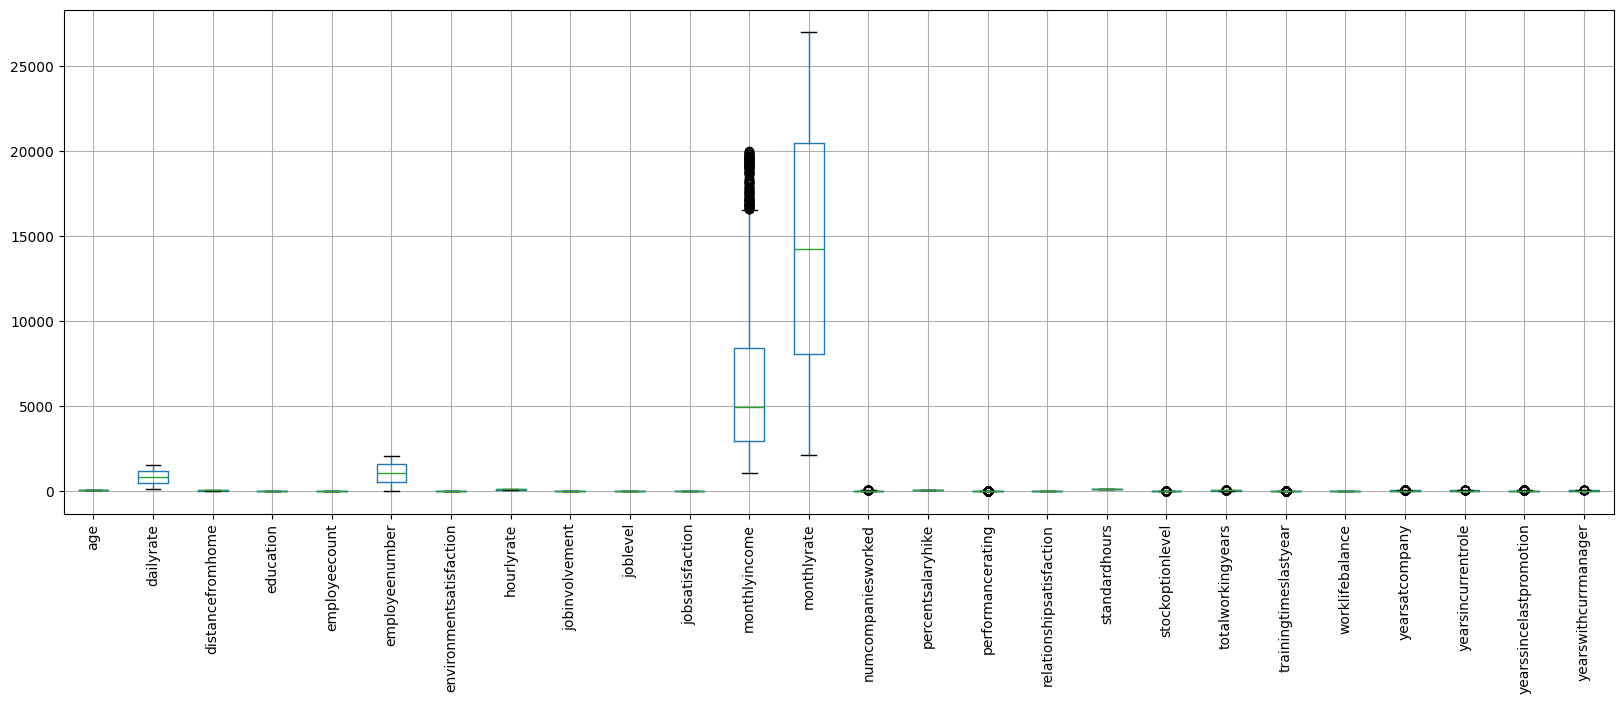

In [10]:
#check for outliers
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)

Monthly income has outliers. We will treat the outliers using the inter quartile range

In [11]:
#removing outliers
for i in df.columns:
    if df[i].dtype == 'int64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)

        iqr=q3-q1
        low=q1-1.5*iqr
        high=q3+1.5*iqr
        df[i]=df[i].clip(lower=low, upper=high)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'dailyrate'),
  Text(3, 0, 'distancefromhome'),
  Text(4, 0, 'education'),
  Text(5, 0, 'employeecount'),
  Text(6, 0, 'employeenumber'),
  Text(7, 0, 'environmentsatisfaction'),
  Text(8, 0, 'hourlyrate'),
  Text(9, 0, 'jobinvolvement'),
  Text(10, 0, 'joblevel'),
  Text(11, 0, 'jobsatisfaction'),
  Text(12, 0, 'monthlyincome'),
  Text(13, 0, 'monthlyrate'),
  Text(14, 0, 'numcompaniesworked'),
  Text(15, 0, 'percentsalaryhike'),
  Text(16, 0, 'performancerating'),
  Text(17, 0, 'relationshipsatisfaction'),
  Text(18, 0, 'standardhours'),
  Text(19, 0, 'stockoptionlevel'),
  Text(20, 0, 'totalworkingyears'),
  Text(21, 0, 'trainingtimeslastyear'),
  Text(22, 0, 'worklifebalance'),
  Text(23, 0, 'yearsatcompany'),
  Text(24, 0, 'yearsincurrentrole'),
  Text(25, 0, 'yearssincelastpromotion'),
  Text(26, 0, 'yearswithcurrmanager')])

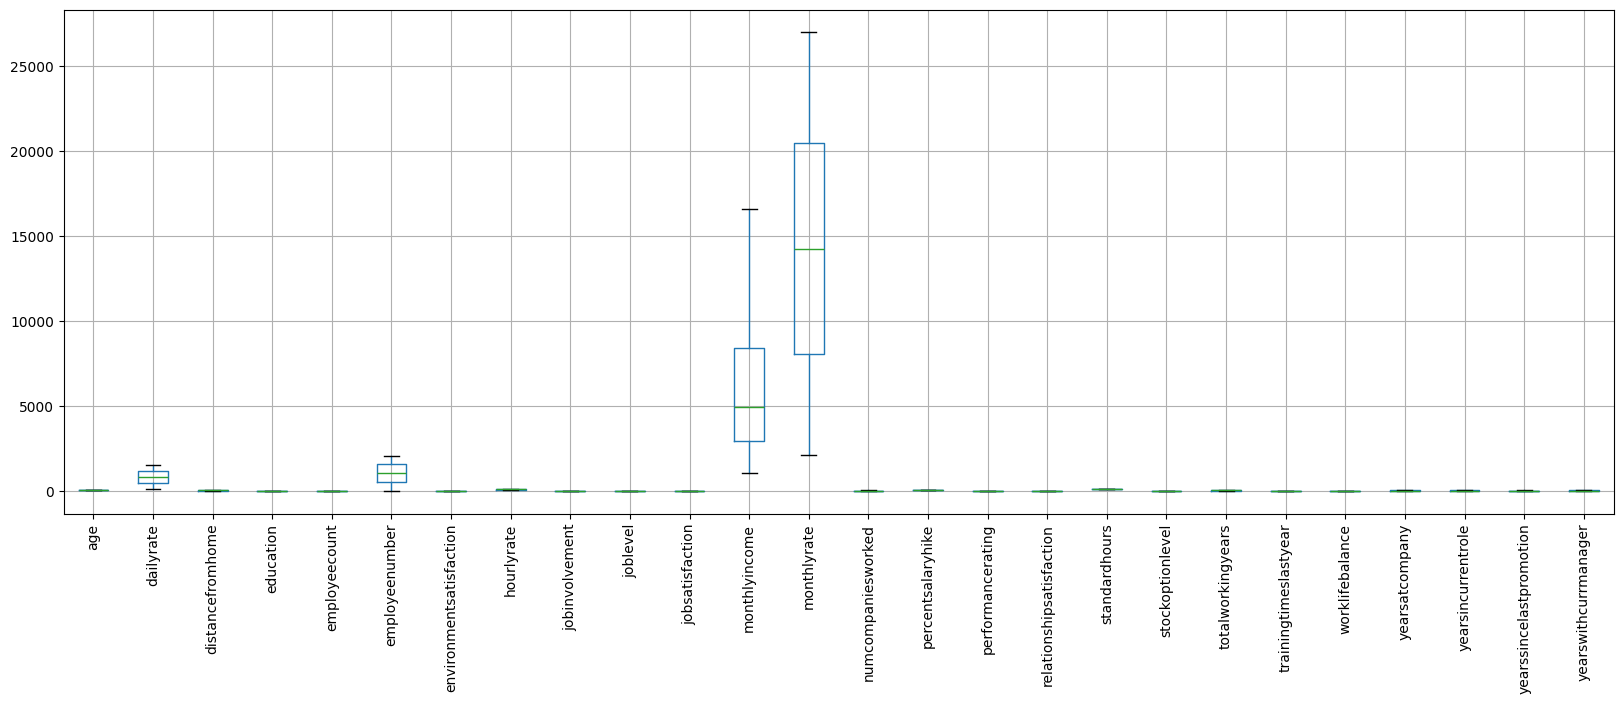

In [12]:
#check for outliers again
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)

In [13]:
#drop columns that are not required
df.drop(['employeecount','employeenumber','standardhours'], axis=1, inplace=True)

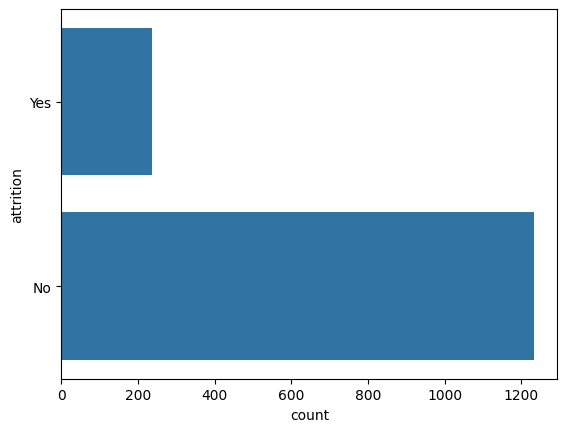

In [14]:
#check the distribution of the target variable
sns.countplot(df['attrition'])
plt.show();

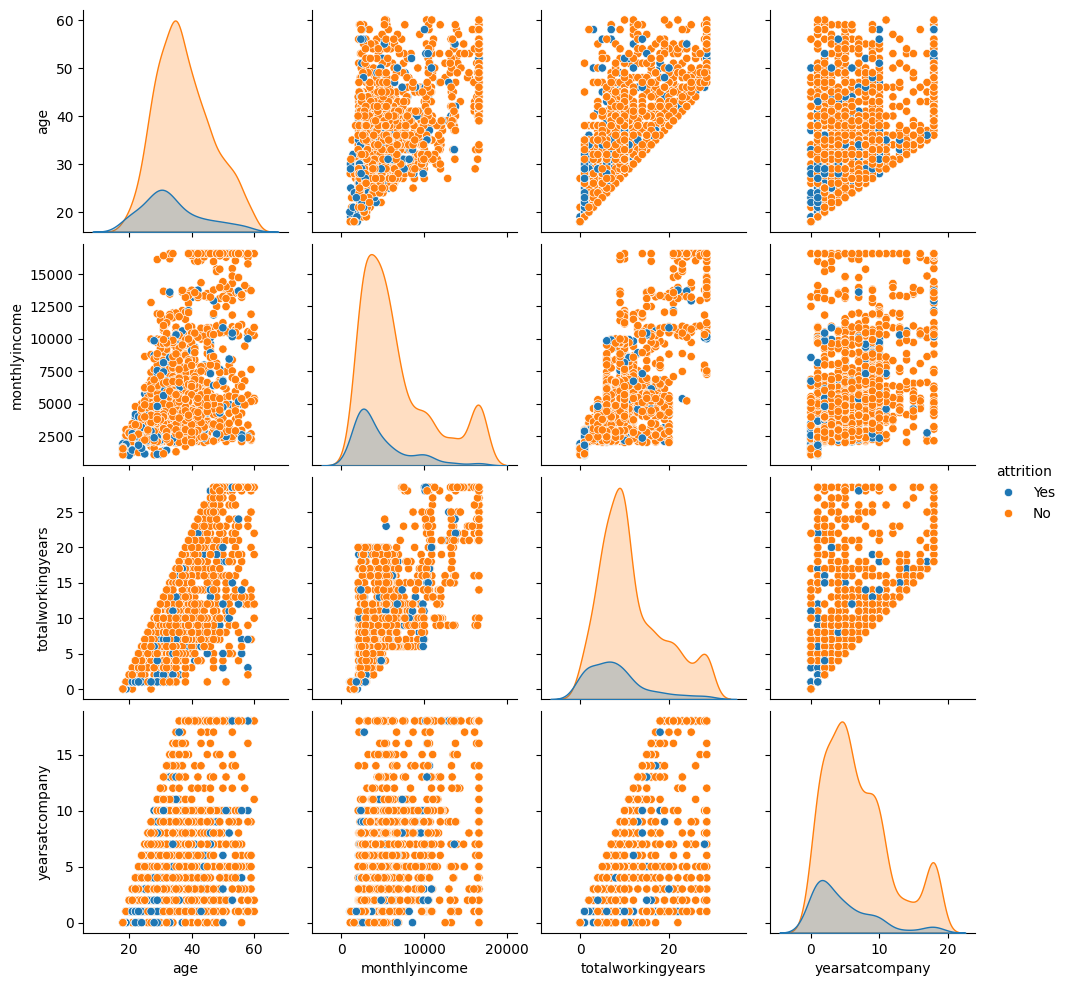

In [15]:
#plot a pairplot with the most correlated features
sns.pairplot(df[['age','monthlyincome','totalworkingyears','yearsatcompany','attrition']],hue='attrition')

Employees below the age of 30 have high chances of leaving the organization. Also employees with low monthly income are likely to leave an organization. The number of years worked in an organization does not determine whether an employee leaves an organization or not.

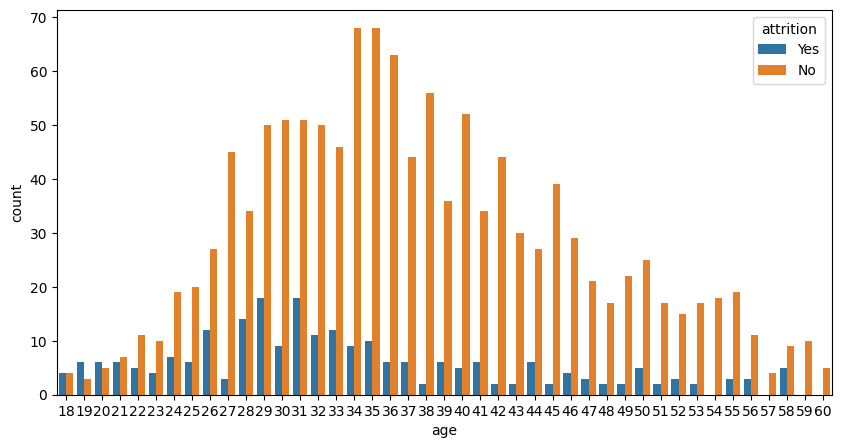

In [16]:
# Attrition ny age
def plot_cat(col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='attrition', data=df)
    plt.show()
plot_cat('age')

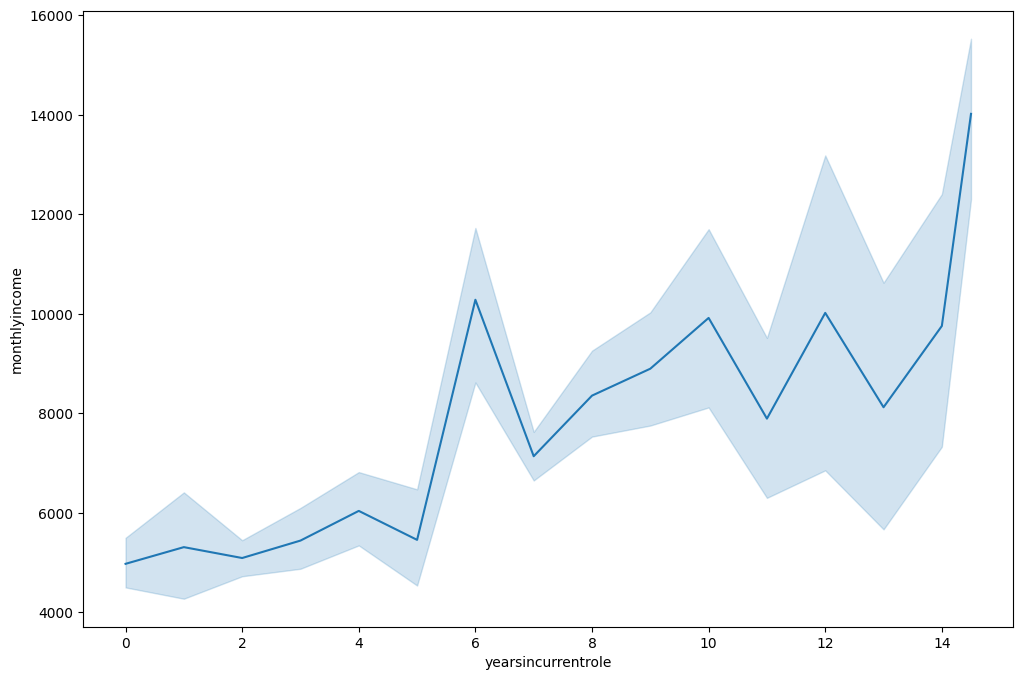

In [17]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='yearsincurrentrole', y='monthlyincome')
plt.show()

The line graph shows a clear and complelling correlation between employeee tenure and monthly income. As employees stay longer with the organization, their monthly income steadily increases, indicating a rewarding trajectory of financial compensation. This relationship highlights how extended loyalty and service are recognized and rewarded with high income levels.

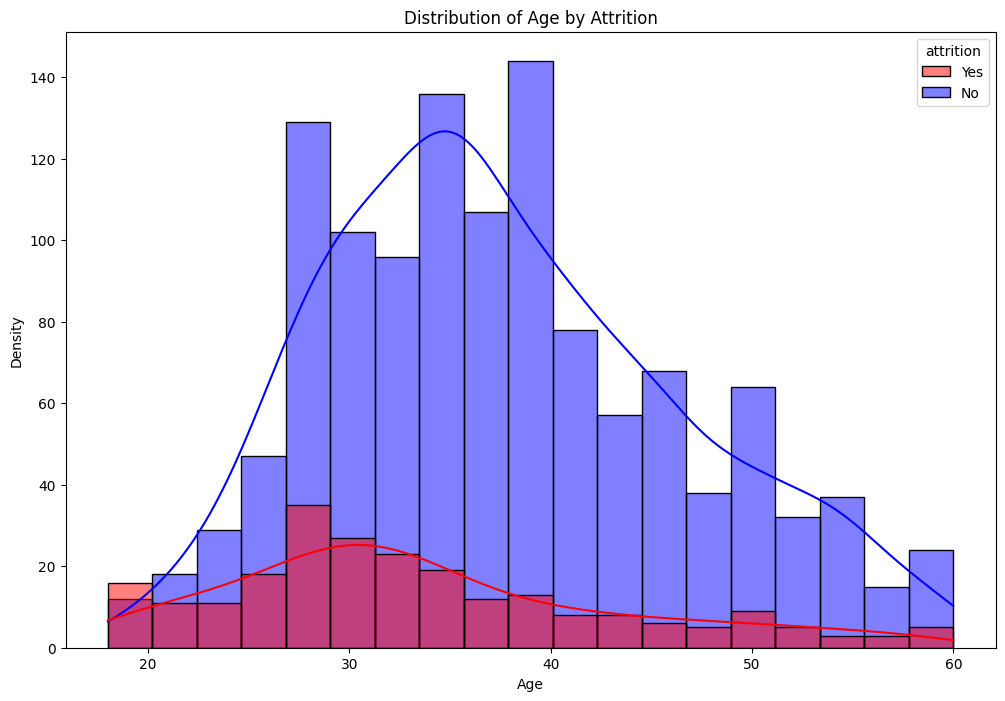

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='age',hue='attrition',kde=True, palette={'Yes':'red','No':'blue'})
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

From the histogram, the age range of 25 to 35 stands out as a critical period with a substantial attrition rate, indicating a higher frequency of voluntary exits. Beyond the age of 40, a noticeable decline in attrition becomes apparent, suggesting reduced likelihood for departures during this career stage. These findings provide a comprehensive view of the attrition landscape, emphasizing the significance of the 25-35 age range as a period of turnover, followed by a phase of stability and retention after the age of 40.

In [19]:
#marital status and attrition
fig = px.histogram(df, x='maritalstatus', color='attrition', title='Number of attritional employees or not by Marital Status')
fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Number of employees',
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=100
    )
)
fig.update_layout(template='plotly_dark')
fig.show()

A higher percentage of employees who left their jobs are single, followed by married and divorced.

In [21]:
#job attrition and job satisfaction
import plotly.graph_objects as go
counts=df.groupby(['jobsatisfaction', 'attrition']). size().unstack().reset_index()
fig=go.Figure()
fig.add_trace(go.Bar(y=counts['jobsatisfaction'], x=counts['Yes'], name='Attrition: Yes', orientation='h',marker_color='Yellow'))
fig.add_trace(go.Bar(y=counts['jobsatisfaction'],x=counts['No'],name='Attrition: No',orientation='h', marker_color='pink'))

fig.update_layout(
    title='Count of Employees by Job Satisfaction and Attrition',
    yaxis_title='Job Satisfaction',
    xaxis_title='Count',
    barmode='group'
)
fig.update_layout(template='plotly_dark')

fig.show()

The job satisfaction analysis reveals attrition patterns: 2-star satisfaction has the lowest attrition, while 1 and 3-star satisfaction have the highest rates. 4-star satisfaction correlates with reduced departures, highlighting the relationship between job satisfaction and attrition.

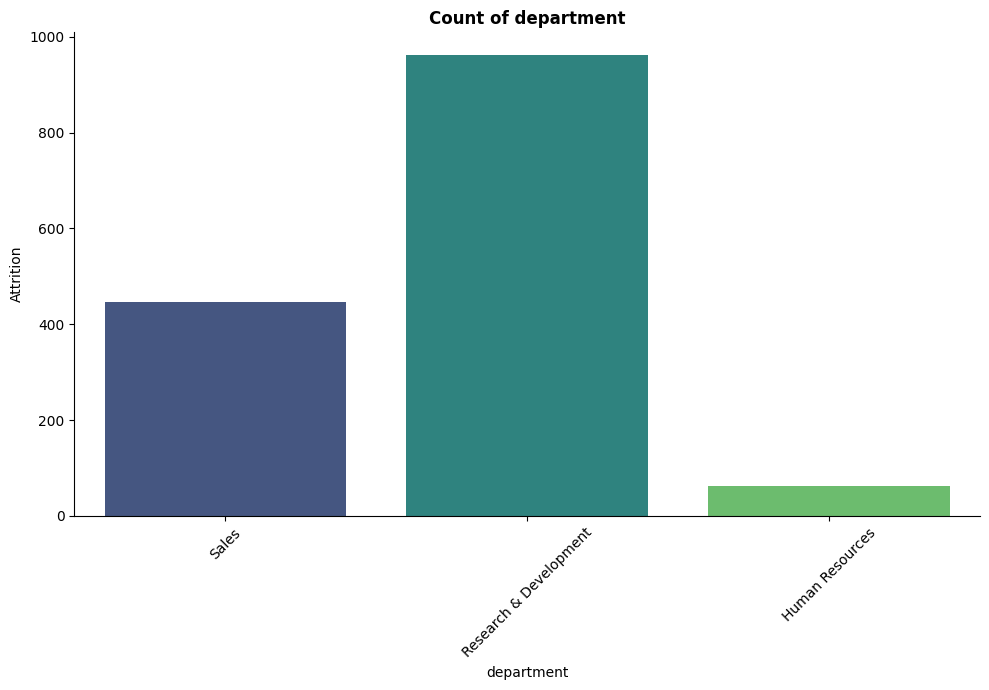

In [23]:
def barplot(column, horizontal):
    plt.figure(figsize=(10, 7))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.xlabel(column)
    plt.ylabel("Attrition")
    plt.title(f"Count of {column}", fontweight='bold')
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

barplot('department', True)

Research and development has the highest attrition rate among employees

In [24]:
#model building
#encoding the categorical variables
le=LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

In [25]:
# split the dataset into train and test
X=df.drop(['attrition'],axis=1)
y=df['attrition']


X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y,random_state=42)

In [26]:
#create a table for all models
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),
        KNeighborsClassifier(),SVC(),GaussianNB(),SGDClassifier(),Perceptron()]

model_names=['Logistic Regression', 'Decision Tree', 'Random Forest','Gradient Boosting','Ada Boost','KNN','SVC','Naive Nayes','SGD Classifier','Perceptron']
accuracy=[]
roc_auc=[]

for i in models:
    i.fit(X_train, y_train)
    y_pred=i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test,y_pred))
model_comparison=pd.DataFrame({'Model':model_names,'Accuracy':accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,ROC AUC
4,Ada Boost,0.870748,0.656043
0,Logistic Regression,0.843537,0.510638
6,SVC,0.840136,0.500000
8,SGD Classifier,0.840136,0.500000
9,Perceptron,0.840136,0.500000
2,Random Forest,0.833333,0.539021
3,Gradient Boosting,0.833333,0.564863
5,KNN,0.819728,0.522310
1,Decision Tree,0.772109,0.580110
7,Naive Nayes,0.751701,0.714403


In [27]:
#Hyperparameter tuning of all models
for i in models:
    hyperparameters = dict()
    if i == LogisticRegression():
        hyperparameters = {'penalty':['L1','L2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == DecisionTreeClassifier():
        hyperparameters = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    elif i == RandomForestClassifier():
        hyperparameters = {'n_estimators':[10,100,100],'max_features':['auto','sqrt','log2']}
    elif i == GradientBoostingClassifier():
        hyperparameters = {'n_estimators':[10,100,1000],'learning_rate':[0.001, 0.01, 0.1, 1]}
    elif i == AdaBoostClassifier():
        hyperparameters = {'n_estimators':[10,100,1000],'learning_rate':[0.001, 0.01, 0.1, 1]}
    elif i == KNeighborsClassifier():
        hyperparameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
    elif i == SVC():
        hyperparameters = {'kernel':['linear','poly','rbf','sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10,100, 1000]}
    elif i == GaussianNB():
        hyperparameters = {}
    elif i == SGDClassifier():
        hyperparameters = {'penalty':['L1','L2', 'elasticnet'],'alpha':[0.0001,0.001, 0.01,0.1,1]}
    elif i == Perceptron():
        hyperparameters={'penalty':['L1','L2','elasticnet'],'alpha':[0.0001,0.001,0.01,0.1,1]}
    clf = GridSearchCV(i, hyperparameters,cv=5)
    best_model=clf.fit(X_train, y_train)
    print(best_model.best_estimator_)
    print(best_model.best_score_)
    print(best_model.best_params_)

LogisticRegression()
0.8409917057338623
{}
DecisionTreeClassifier()
0.7797367472051929
{}
RandomForestClassifier()
0.8554489722322394
{}
GradientBoostingClassifier()
0.8520699603317705
{}
AdaBoostClassifier()
0.8673674720519294
{}
KNeighborsClassifier()
0.8248287053732419
{}
SVC()
0.838434908041832
{}
GaussianNB()
0.7730219978362783
{}
SGDClassifier()
0.6899098449332852
{}
Perceptron()
0.8052434186801298
{}


In [28]:
#table of hypertuned models
models=[LogisticRegression(C=0.001, penalty='l2'), DecisionTreeClassifier(criterion='entropy',max_depth=3),RandomForestClassifier(n_estimators=100),
        GradientBoostingClassifier(learning_rate=0.1, n_estimators=100),AdaBoostClassifier(learning_rate=0.1, n_estimators=100),KNeighborsClassifier(n_neighbors=1),
        SVC(C=0.001, kernel='linear'),GaussianNB(),SGDClassifier(alpha=0.0001, penalty='l2'),Perceptron(alpha=0.0001, penalty='l2')]

model_names=['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','Ada Boost','KNN','SVC','Naive Bayes','SGD Classifier','Perceptron']

accuracy=[]
roc_auc=[]

for i in models:
    i.fit(X_train, y_train)
    y_pred=i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison=pd.DataFrame({'Model':model_names,'Accuracy':accuracy, 'ROC AUC':roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
1,Decision Tree,0.860544,0.615514
0,Logistic Regression,0.843537,0.510638
4,Ada Boost,0.840136,0.534456
6,SVC,0.840136,0.500000
8,SGD Classifier,0.840136,0.500000
9,Perceptron,0.840136,0.500000
3,Gradient Boosting,0.833333,0.564863
2,Random Forest,0.826531,0.526359
7,Naive Bayes,0.751701,0.714403
5,KNN,0.741497,0.527436


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


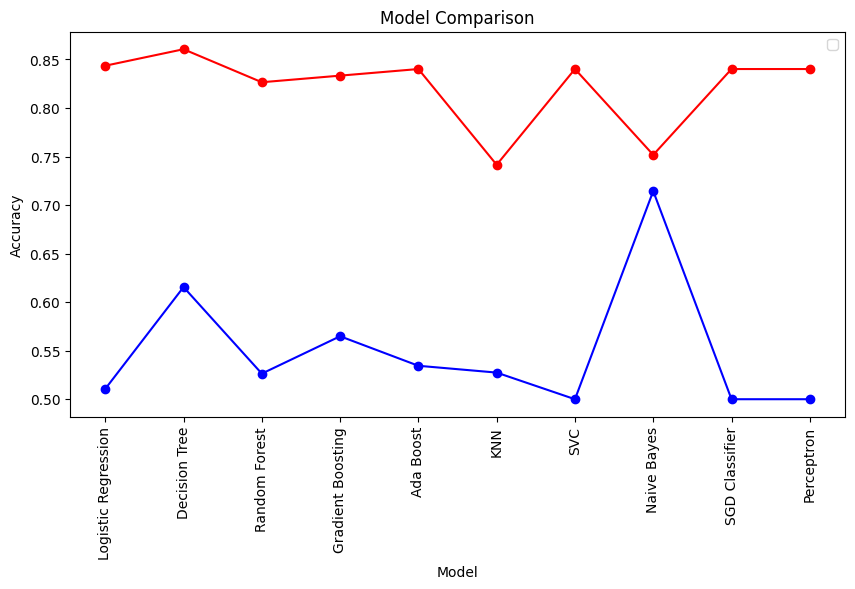

In [29]:
#model comparison
plt.figure(figsize=(10,5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'],color='red',marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'],color='blue',marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

0.8333333333333334
0.5648634679989664


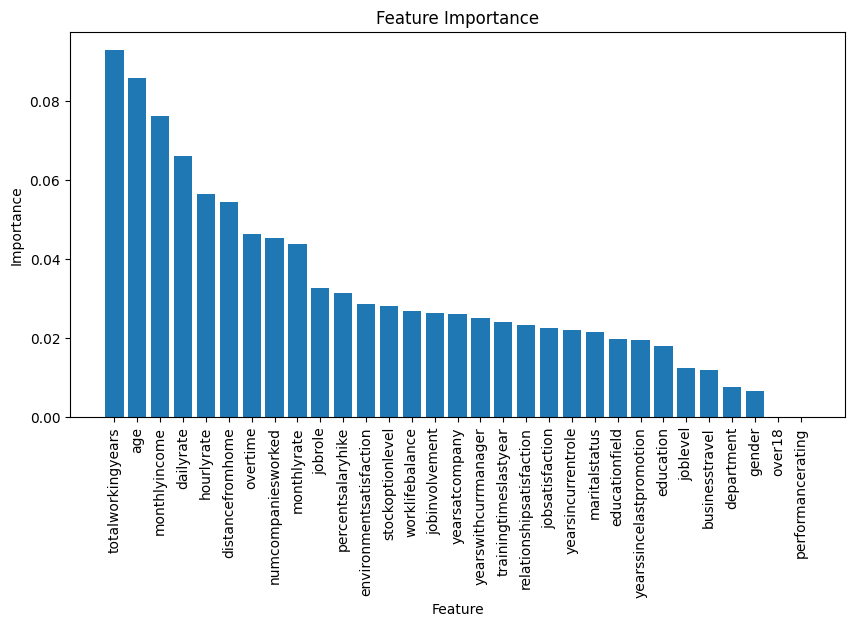

In [30]:
#feature importance plot
model=RandomForestClassifier(max_features=None,n_estimators=100)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

feature_importance=pd.DataFrame({'Feature':X.columns, 'Importance':model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10,5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [31]:
#final results
rf=RandomForestClassifier(max_features=None, n_estimators= 100)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy Score:  0.8367346938775511
ROC AUC Score:  0.5927297786200362
